<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/DL/DL_S10_Part_1_(Univariate_Time_Series_with_RNN_RSCCASN)_tanh_2layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# Data Info

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data¶

In [3]:
df = pd.read_csv('/content/RSCCASN.csv',
                index_col='DATE',
                parse_dates=True
                )

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df.columns = ['Sales']

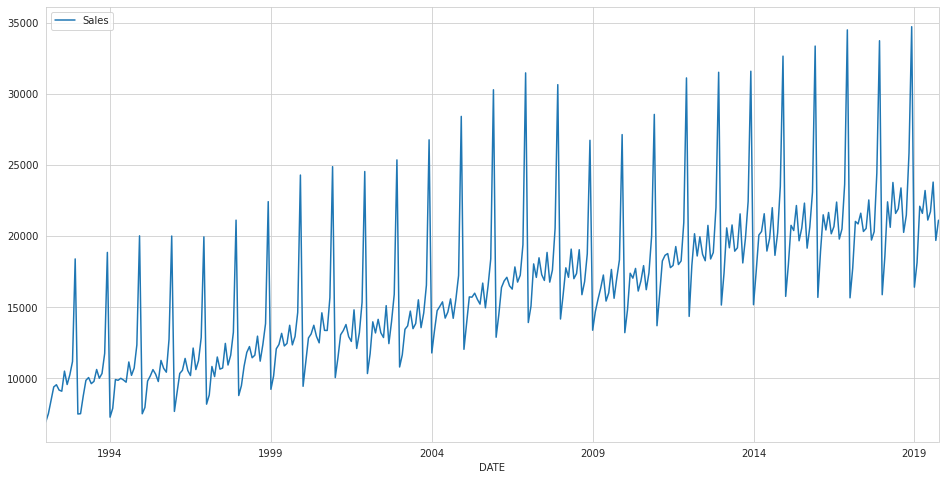

In [7]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [8]:
len(df)

334

In [9]:
test_size = 24

In [10]:
test_ind = len(df)- test_size
test_ind

310

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [12]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [13]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# help(TimeseriesGenerator)

In [18]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [19]:
len(generator)

298

In [20]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]), array([[0.02047633]]))

In [21]:
X, y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


# Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [24]:
train_scaled.shape

(310, 1)

In [25]:
n_features = train_scaled.shape[1]

In [26]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [ ]:
4 * ((100+1)*50+(50**2))

30200

## EarlyStopping and Validation Generator

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [30]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [82]:
len(validation_generator)

12

In [83]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
322/322 [==============================] - 5s 17ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 2/120
322/322 [==============================] - 4s 14ms/step - loss: 0.0053 - val_loss: 0.0113
Epoch 3/120
322/322 [==============================] - 4s 13ms/step - loss: 0.0030 - val_loss: 0.0079
Epoch 4/120
322/322 [==============================] - 4s 13ms/step - loss: 0.0026 - val_loss: 0.0079
Epoch 5/120
322/322 [==============================] - 4s 13ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 6/120
322/322 [==============================] - 5s 14ms/step - loss: 0.0020 - val_loss: 0.0076
Epoch 7/120
322/322 [==============================] - 4s 14ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 8/120
322/322 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/120
322/322 [==============================] - 4s 13ms/step - loss: 0.0021 - val_loss: 8.5994e-04
Epoch 10/120
322/322 [==============================] - 4s 13ms/step - loss: 0

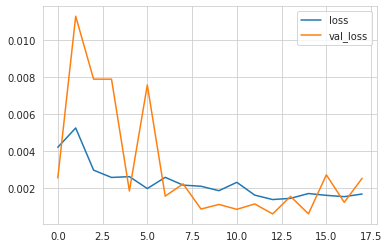

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluation on Test Data

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [87]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [88]:
predictions_scaled

[array([0.6594512], dtype=float32),
 array([0.99812174], dtype=float32),
 array([0.3444238], dtype=float32),
 array([0.4203042], dtype=float32),
 array([0.52560604], dtype=float32),
 array([0.52507675], dtype=float32),
 array([0.5411177], dtype=float32),
 array([0.49955797], dtype=float32),
 array([0.51276124], dtype=float32),
 array([0.54130304], dtype=float32),
 array([0.45102528], dtype=float32),
 array([0.49059325], dtype=float32)]

In [89]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9391727039224899 
mae: 0.032935488868462565 
mse: 0.001347168004826648 
rmse: 0.036703787336277


## Inverse Transformation and Comparing

In [90]:
predictions = scaler.inverse_transform(predictions_scaled)

In [91]:
compare = test[:12]

In [92]:
compare['Predictions'] = predictions

In [93]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,25101.923
2017-12-01,33720,34430.265
2018-01-01,15881,16424.809
2018-02-01,18585,18514.859
2018-03-01,22404,21415.293
2018-04-01,20616,21400.714
2018-05-01,23764,21842.547
2018-06-01,21589,20697.825
2018-07-01,21919,21061.495


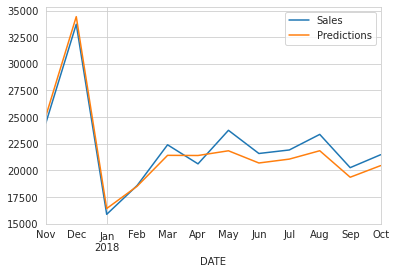

In [94]:
compare.plot()

In [95]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.9391727039224896 
mae: 907.1751053929344 
mse: 1022058.5583390932 
rmse: 1010.9691183904151


# Retrain and Forecasting

In [96]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [97]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [98]:
len(df)

334

In [99]:
len(generator)

322

In [100]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 8s 13ms/step - loss: 0.0230
Epoch 2/15
322/322 [==============================] - 5s 14ms/step - loss: 0.0183
Epoch 3/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0174
Epoch 4/15
322/322 [==============================] - 5s 14ms/step - loss: 0.0169
Epoch 5/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0151
Epoch 6/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0158
Epoch 7/15
322/322 [==============================] - 4s 14ms/step - loss: 0.0161
Epoch 8/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0149
Epoch 9/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0118
Epoch 10/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0094
Epoch 11/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0093
Epoch 12/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0060
Epoch 13/15
3

In [101]:
scaled_full_data.shape

(334, 1)

In [102]:
scaled_full_data[-length:].shape

(12, 1)

In [103]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [104]:
forecast = scaler.inverse_transform(forecast)

In [105]:
forecast

array([[28435.70111895],
       [31352.31984282],
       [16451.35052347],
       [18527.04584527],
       [22286.61060762],
       [21951.10415077],
       [23397.37291574],
       [20546.46771169],
       [21918.17063904],
       [23385.81991863],
       [19014.97568679],
       [24365.43756819]])

In [106]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [107]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [108]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [109]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [110]:
forecast_df

,Forecast
2019-11-01,28435.701
2019-12-01,31352.320
2020-01-01,16451.351
2020-02-01,18527.046
2020-03-01,22286.611
2020-04-01,21951.104
2020-05-01,23397.373
2020-06-01,20546.468
2020-07-01,21918.171
2020-08-01,23385.820


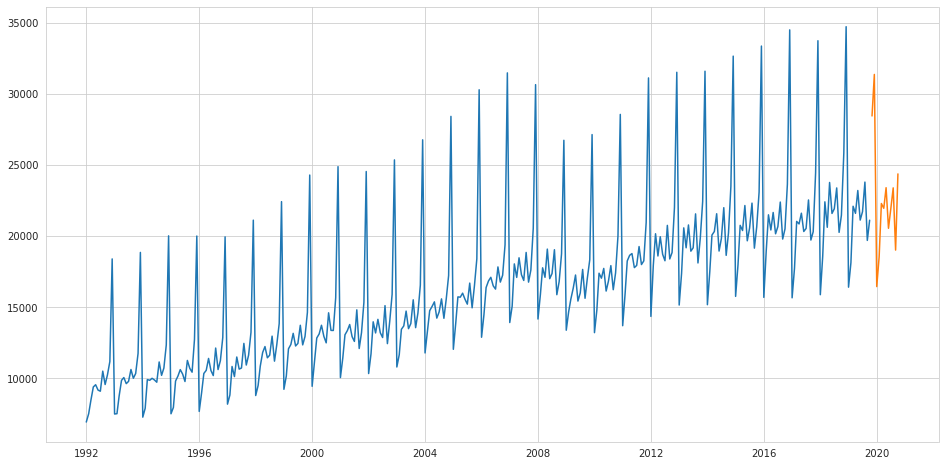

In [111]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

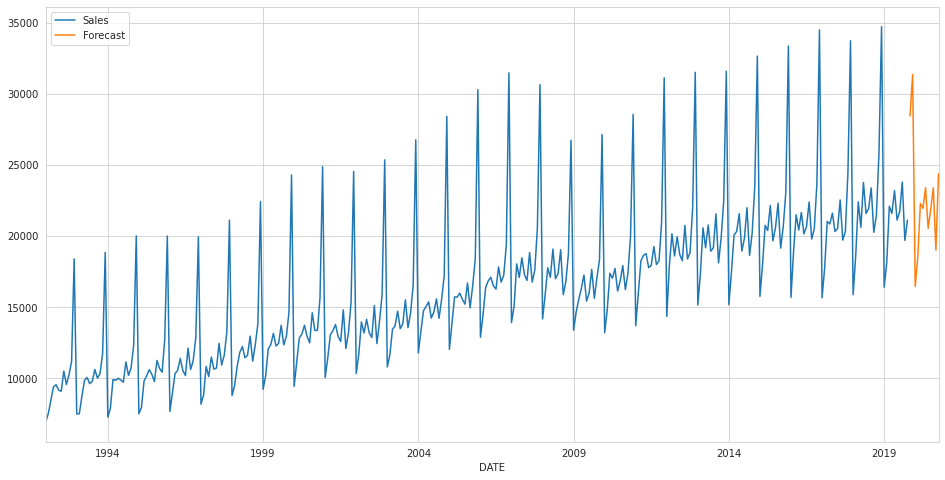

In [112]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

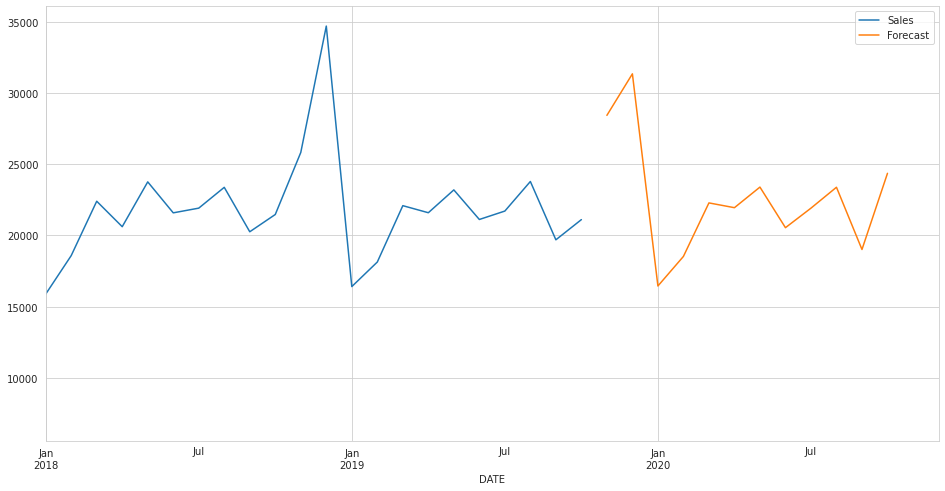

In [113]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [114]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)

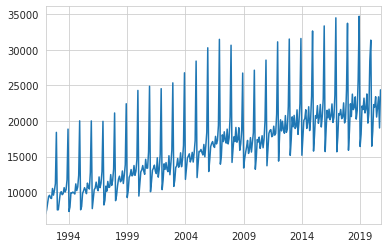

In [115]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___